**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2021**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 03

**Datos de la entrega:** Domingo 03 de octubre 2021, a más tardar a las 11:59 pm

**Estudiantes:**
- Jose Pablo Salazar Granados
- Lindsay Fernanda Morales Bonilla





___

# Parte 1  -  Ejercicio
___

# Introducción

Considere:
- Se le proporciona un conjunto de datos (Concrete_Data - USAR)-
- El objetivo de esta parte es ver como el estudiante se enfrenta al proceso de pre-procesamiento, selección de atributos, predicción y evaluación.  Por eso es muy importante que documente en este cuaderno sus decisiones, eso se tomará muy en cuenta en la evaluación de su respuesta.
- El atributo a predecir en regresión se denomina: **Cement**.
- Debe comentar ampliamente su código
- El profesor hará el rol del **cliente** por si tiene consultas sobre el conjunto de datos.


### Sobre este dataset 

Name -- Data Type -- Measurement -- Description

- id -- quantitative -- integer
- Cement -- quantitative -- kg in a m3 mixture 
- Blast Furnace Slag -- quantitative -- kg in a m3 mixture 
- Fly Ash -- quantitative -- kg in a m3 mixture 
- Water -- quantitative -- kg in a m3 mixture 
- Superplasticizer -- quantitative -- kg in a m3 mixture 
- Coarse Aggregate -- quantitative -- kg in a m3 mixture 
- Fine Aggregate -- quantitative -- kg in a m3 mixture 
- Age -- quantitative -- Day (1~365) 
- Concrete compressive strength -- quantitative -- MPa 


### 1 (10 puntos)
- Cargue el archivo.
- Utilice las herramientas (gráficos, funciones que describen contenido o características de las variables, etc) que considere necesarias para analizar los atributos que tiene el dataset y ver si tiene valores faltantes, valores atípicos, etc.
- Comente sus conclusiones sobre los atritubos.


In [107]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



#The file is not comma separated but is using ";"
data = pd.read_csv('Concrete_Data - USAR.csv', sep=";")

Según el cliente, los rangos para cada atributo son los siguientes:

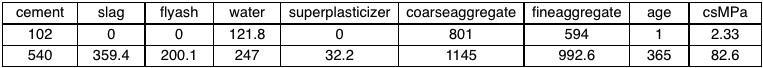

### TESTING SECTION

In [101]:
# We explore the initial contents
print(data.head(10))

# A Deep copy is created to do exploration without data corruption
dataAux = data.copy(deep=True)

# MISSING VALUES

print('\nObservamos la cantidad de valores faltantes (NaN) para cada atributo')
print(dataAux.isnull().sum())
#Since we only got missing values on 'coarseaggregate' attribute, we will delete them temporarily
dataAux.dropna(inplace=True)


# OUTLIERS

# We plot the data to visualize it all together
figure(figsize=(14,8))
for column in data.columns:
    plt.plot(data[column], label=column)
plt.legend()
plt.show()

# Since super and id are disturbing the view, we'll ignore it for a moment
# Normal Plot 
print("La grafiación de los otros elementos sin la distorción de la columna superplasticizer")
figure(figsize=(24,14)) # Augment figure size to appreciate details in a better way
for column in data.columns:
    if column == "id": continue
    if column == "superplasticizer": continue
    plt.plot(dataAux[column], label=column)
plt.legend()
plt.show()

# BoxPlot to spot outliers
print("Buscamos valores fuera de los bigotes")

fig, axs = plt.subplots(1, 9)
figCounter = 0

for column in data.columns:
    if column == "id": continue #no es de nuestro interés
    # figure(figsize=(2,8))
    axs[figCounter].boxplot(dataAux[column])
    axs[figCounter].set_title(column)
    figCounter += 1

fig.subplots_adjust(left=0.02, right=4, bottom=0.05, top=0.9,
                   hspace=1, wspace=0.5)
plt.show()

lowerBounds = {"cement":102,"slag":0,"flyash":0,"water":121.8,"superplasticizer":0,"coarseaggregate":801,"fineaggregate":594,"age":1,"csMPa":2.33}
upperBounds = {"cement":540,"slag":359.4,"flyash":200.1,"water":247,"superplasticizer":32.2,"coarseaggregate":1145,"fineaggregate":992.6,"age":365,"csMPa":82.6}

print('\nObservamos el mínimo y máximo para cada atributo:')
print(dataAux.describe().loc[['min','max']])
print('\nA partir de los datos anteriores se puede observar que la única columna que posee valores fuera del rango definido por el cliente es superplasticizer, por lo que el resto de outliers no es necesario procesarlos\n')

# CREO QUE ESTO YA NO LO NECESITAMOS
# for column in data.columns:
#     data[column] = data[column].mask(data[column] > upperBounds[column],np.NaN)
#     data[column] = data[column].mask(data[column] < lowerBounds[column],np.NaN)
    
# print(data.isnull().sum())

# COLUMN EXPLORATION

print("Ahora observaremos por separado la columna superplasticizer")
figure(figsize=(14,8))
plt.plot(dataAux["superplasticizer"], label="superplasticizer")
plt.show()


# Check for the outliers
print("values out of superplasticizer defined bounds:")
for elem in dataAux["superplasticizer"]:
    if elem>upperBounds['superplasticizer'] or elem<lowerBounds['superplasticizer']:
        print(elem)
        
# The outliers in range are eliminated just to look at the rest of the data of that column
index_names = dataAux[ (dataAux["superplasticizer"] > upperBounds['superplasticizer']) | (dataAux["superplasticizer"] < lowerBounds['superplasticizer'])].index
dataAux.drop(index_names, inplace = True)   

print("Una vez eliminados los valores fuera del rango podemos ver la columna")
figure(figsize=(4,10))
plt.boxplot(dataAux["superplasticizer"])
plt.show()

# Re-Plotting the data without outliers (Data Auxiliar, not on the real df)
print("Ahora observamos segun rangos similares los datos y obtenemos que")
figure(figsize=(14,8))
columnsToHide = ["id", "coarseaggregate", "fineaggregate"]
for column in dataAux.columns:
    if column in columnsToHide: continue 
    plt.plot(dataAux[column], label=column)
plt.legend()
plt.show()


print("And lastly, we show the values that  are higher")
higherValues = columnsToHide[1:] # We pop the id from the list
figure(figsize=(14,8))
for column in dataAux.columns:
    if column not in higherValues: continue 
    plt.plot(dataAux[column], label=column)
plt.legend()
plt.show()

## Conclusiones

En primer lugar, se identificaron las columnas en las cuáles hay valores faltantes o NaN y se encontró que únicamente el atributo 'coarseaggregate' posee NaNs.

Luego, se graficaron los datos de cada columna, sin embargo se encontró que el atributo 'superplasticizer' posee valores muy altos por lo que se distorciona el primer gráfico mostrado. Debido a esto se toma de decisión de graficar los datos sin los valores de esta columna de modo que se pueda observar mejor el comportamiento de cada uno de los demás atributos. Y por aparte se realizó la gráfica de los valores de dicha columna.

Con el fin de observar si hay presencia o no de valores atípicos en cada una de las columnas, se graficaron boxplots para cada una de ellas. Acá se encontró que los atributos: slag, water, superplasticizer, fineaggregate, age y csMPa poseen outliers, sin embargo únicamente la columna superplasticizer posee valores fuera del rango normal definido por el cliente, por lo que el resto de outliers se mantendrán en el dataset.

Finalmente, se graficaron los datos de cada una de las columnas. Esto se realizó con dos gráficas por facilidad de visualización, pues los atributos coarseaggregate y fineaggregate están compuestos por valores muy altos, lo que puede distorsionar la visualización del resto de atributos si se incluyen todos en la misma gráfica.

### 2 (5 puntos)
- Se utilizará el modelo Train/Validation (70%)  y Test (30%). 
- Comente su decisión sobre los parámetros shuffle y random_state
- Separe  los  conjuntos de datos (70-30) (X_trainVal, X_test, y_trainVal, y_test )
- Muestre los primeros 5 registros de cada conjunto.


In [108]:
# Separación entre train y test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('cement', axis=1), data['cement'], test_size=0.3, random_state=42) #se separan los conjuntos train y test

#se muestran los primeros 5 registros de cada conjunto
print('X_train:\n',X_train.head(5),'\n')
print('X_test:\n',X_test.head(5),'\n')
print('y_train:\n',y_train.head(5),'\n')
print('y_test:\n',y_test.head(5))

X_train:
       id   slag  flyash  water  superplasticizer  coarseaggregate  \
196  197    0.0   100.5  165.6               7.5           1006.4   
631  632    0.0     0.0  184.0               0.0           1063.0   
81    82  212.5     0.0  155.7              14.3            852.1   
526  527   19.0   141.0  154.0              10.9            942.0   
830  831  190.0   148.0  179.0              19.0            838.0   

     fineaggregate  age  csMPa  
196          905.9   28  25.72  
631          783.0    7  17.54  
81           880.4    3  25.20  
526          801.0    3  23.64  
830          741.0   28  33.76   

X_test:
       id   slag  flyash  water  superplasticizer  coarseaggregate  \
31    32  114.0     0.0  228.0               0.0            932.0   
109  110  189.0     0.0  164.9              11.6            944.7   
136  137  189.0     0.0  145.9              22.0            944.7   
88    89  189.0     0.0  164.9              11.6            944.7   
918  919    0.0   179

## Decisión sobre los parámetros

En el caso del parámetro shuffle se decidió mantenerlo con el default (True), pues a partir de la visualización de los datos se consideró que la mejor decisión sería mezclarlos antes de la separación de los sets train y test. Por otro lado, respecto al parámetro random_state se prefirió utilizar un número para así asegurar la reproducibilidad del experimento. Además, al investigar y consultar la documentación oficial de scikit learn se observó que los enteros 0 y 42 son los popularmente utilizados, por lo que se tomó la decisión de emplear el 42, ya que este es el utilizado oficialmente en los ejemplos presentados por scikit learn.

### 3  (15 puntos)
- Preprocese los atributos (Solo deje para más adelante escalar los datos).
- Debe comentar en celdas del texto el por qué seleccionó las técnicas utilizadas.

In [109]:
#tratamiento de outliers extremos en superplasticizer

print("Superplasticizer outliers tratados:")


index = X_train[(X_train["superplasticizer"] > 32.2) | (X_train["superplasticizer"] < 0)].index

X_train.drop(index, inplace=True)
y_train.drop(index, inplace=True)

#mean median imputation
X_train.replace(np.nan, 1, inplace=True)
y_train.replace(np.nan, 1, inplace=True)  


Superplasticizer outliers tratados:


### 4 (10 puntos)
- Realice selección de atributos.
- Debe utilizar al menos una técnica para justificar su decisión (De entre los métodos: Filter, Wrapper, Embedded).
- ¿Qué hará con el atributo denominado: "Id"?
- Comente sus conclusiones.


In [110]:
X_train.drop('id', axis=1, inplace=True) #se elimina la columna id del dataset Train
X_test.drop('id', axis=1, inplace=True) #se elimina la columna id del dataset Test

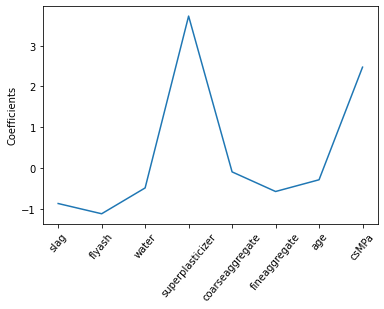

In [111]:
# Se obtienen los nombres de las columnas
columnNames = X_train.columns

# Buscamos el mejor alpha
bestAlpha=1
lasso = LassoCV(cv=10, random_state=0) # Aplicará 100 alphas con cada uno auto

# Se aplica Lasso
lasso = lasso.fit(X_train, y_train)
lassoCoefficients = lasso.coef_

# Observamos graficamente los valores mayores a 0
plt.ylabel('Coefficients')
plt.plot(range(len(columnNames)), lassoCoefficients)
plt.xticks(range(len(columnNames)), columnNames, rotation=50)
plt.show()

Lasso es la única que podemos emplear para que nos indique cuales son los features que más nos sirven dado que Ridge no los busca. Además, Lasso es mejor para este escenario porque tenemos muchos features y no sabemos si todos son de valor. 


Ahora, una vez realizado el cálculo, observamos que  existe relación entre el atributo _superplasticizer_ y _cement_. Previamente se observaban muchos atributos pero resulta que no todos son importantes.

### 5  (5 puntos)
- Escale los datos.
- Comente qué técnica utilizó y por qué.
- Guarde el archivo ya pre-procesado con el nombre: "'Concrete_DataPROCESADO"

**Nota:** No olvide cómo manejará el "bias" (o agregar columna de unos, o si la implementación de los algoritmos que utilizará permiten indicarle que lo agregue).


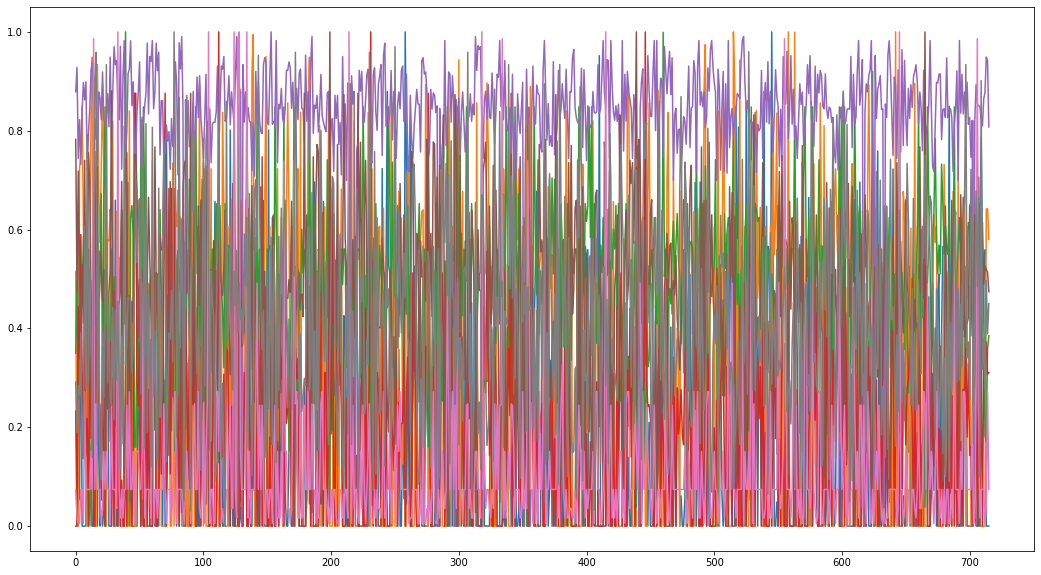

In [113]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
X_Train_Scaled = scaler.fit_transform(X_train)
figure(figsize=(18,10))
plt.plot(X_Train_Scaled)


### 6 (20 puntos)
Presente e implemente un diseño experimental que incluya:
- Cuatro algoritmos diferentes:
    - Uno será la regresión lineal de mínimos cuadrados sin regularización (OLSR).
    - Otro el método de regresión RIDGE.
    - Usted eligirá dos métodos más de regresión, que no sean de los vistos en clase. Si tiene dudas de si puede o no usar algún método, puede consultar al profesor.
    - Como el OLSR no tiene hiperparámetros, use todo el train/validation para entrenar. Para los otros dos métodos, debe usar ten-cross-validation para seleccionar **al menos un hiperparámetro**.
    - Debe registrar las métricas RMSE y R2. Usted decide cuál de estas dos métricas usa para selecionar la mejor configuración (Justifique su selección). Recuerde aspectos como analizar promedios y desviaciones estándar.
    
**Nota:** Para cada uno de los dos algoritmos seleccionados (no el OLSR) explique los parámetros que recibe. 
    

### 7 (15 puntos)

- Por medio de una tabla u otro método idóneo que Usted determine, resuma todos los resultados obtenidos (o la mayoría).
- Grafique comparativamente los valores del real versus el predicho (test), de cada uno de los métodos utilizados.  
- Si tuviera que recomendar un método a usar con este dataset ¿cuál sería de los comparados y por qué?
- Qué conclusiones finales saca sobre los métodos usados como predictores.

___

# Parte 2  -  Temas por grupo (20 puntos)
___

Considere lo siguiente:
1. Revise en el archivo PDF: "Temas por grupo", qué cuadernos jupyter le corresponden a su grupo.
1. Estudie los cuadernos asignados.
1. Prepare un único cuaderno de jupyter (comentando con celdas de texto en español), en que resume y explica las técnicas asignadas. 
1. Prepare un video para una posible presentación de sus temas en clase, no debe durar más 12 minutos en la presentación de los temas asignados (Considere que el material preparado será compartido con sus compañer(a/o)s del curso y por tanto se espera que se esmere en su elaboración y clara explicación -- por favor -- ). 